### Q1

In [5]:
import numpy as np

In [6]:
v1 = np.array([1,2,3])
v2 = np.array([10, 12, 14])

In [7]:
mu1 = v1.mean()
mu2 = v2.mean()

In [13]:
p = np.dot((v1 - mu1), (v2 - mu2)) / (np.dot((v1 - mu1), (v1 - mu1))**0.5 * np.dot((v2 - mu2), (v2 - mu2)) ** 0.5)
print(f"Pearson Correlaton: {p:.3f}")

Pearson Correlaton: 1.000


In [14]:
c = np.dot(v1, v2) / (np.dot(v1, v1)**0.5 * np.dot(v2, v2)**0.5)
print(f"Cosine Correlaton: {c:.3f}")

Cosine Correlaton: 0.968


### Q2

In [17]:
import numpy as np

In [34]:
offset = np.random.randint(-50, 51)
v1 = np.array([0, 1, 2, 3])
v2 = v1 + offset

In [35]:
pearson = []
cosine = []
for offset in range(-50, 51):
    v2 = v1 + offset
    
    # 두 벡터의 평균 구하기
    mu1 = v1.mean()
    mu2 = v2.mean()
    
    # 두 벡터의 피어슨 상관계수와 코사인 유사도 구하기
    p = np.dot((v1 - mu1), (v2 - mu2)) / (np.dot((v1 - mu1), (v1 - mu1))**0.5 * np.dot((v2 - mu2), (v2 - mu2)) ** 0.5)
    c = np.dot(v1, v2) / (np.dot(v1, v1)**0.5 * np.dot(v2, v2)**0.5)
    
    pearson.append(p)
    cosine.append(c)

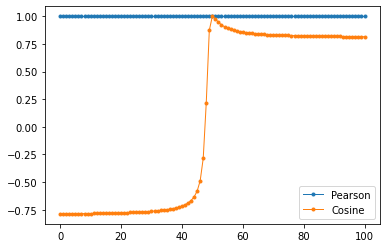

In [50]:
import matplotlib.pyplot as plt

plt.plot(pearson, marker = "o", markersize = 3, linewidth = 1, label = "Pearson")
plt.plot(cosine, marker = "o", markersize = 3, linewidth = 1, label = "Cosine")
plt.legend()

### Q3

In [51]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

Signature: pearsonr(x, y)
Source:   
def pearsonr(x, y):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these datasets.

    

### Q4

In [66]:
%%timeit
for _ in range(10000):
    v1 = np.random.random(size = (100, ))
    v2 = np.random.random(size = (100, ))
    
    # 두 벡터의 평균 구하기
    mu1 = v1.mean()
    mu2 = v2.mean()
    
    # 두 벡터의 피어슨 상관계수와 코사인 유사도 구하기
    p = np.dot((v1 - mu1), (v2 - mu2)) / (np.dot((v1 - mu1), (v1 - mu1))**0.5 * np.dot((v2 - mu2), (v2 - mu2)) ** 0.5)
    # c = np.dot(v1, v2) / (np.dot(v1, v1)**0.5 * np.dot(v2, v2)**0.5)

387 ms ± 20.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
%%timeit
for _ in range(10000):
    v1 = np.random.random(size = (100, ))
    v2 = np.random.random(size = (100, ))
    
    p = np.corrcoef(v1, v2)


1.82 s ± 402 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Q5

In [102]:
import numpy as np

In [103]:
kernel = np.array([-1,1])
ts = np.array([-1]*10 + [1]*10 + [-1]*10)

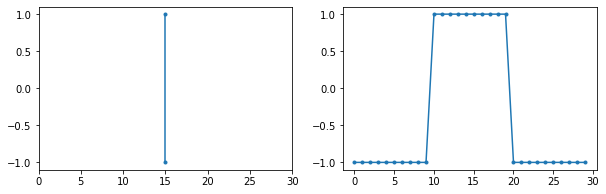

In [104]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
ax[0].plot([15, 15], kernel, marker = "o", markersize = 3)
ax[0].set_xlim(0, 30)

ax[1].plot(ts, marker = "o", markersize = 3)

In [113]:
featureMap = np.zeros(len(signal))
for t in range(1, len(ts)-1):
    featureMap[t] = np.dot(kernel, ts[t-1:t+1])

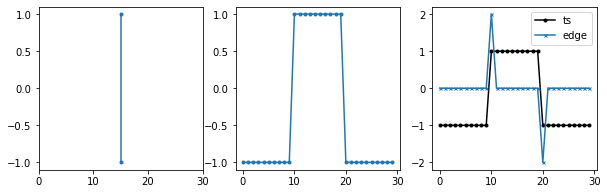

In [114]:
fig, ax = plt.subplots(1, 3, figsize = (10, 3))
ax[0].plot([15, 15], kernel, marker = "o", markersize = 3)
ax[0].set_xlim(0, 30)

ax[1].plot(ts, marker = "o", markersize = 3)

ax[2].plot(ts, marker = "o", markersize = 3, color = "black", label = "ts")
ax[2].plot(featureMap, marker = "x", markersize = 3, label = "edge")
plt.legend()

### Q6

In [128]:
kernel = np.array([0, .1, .3, .8, 1, .8, .3, .1, 0]) # 저주파 필터
kernel = kernel/kernel.sum() # 커널 중앙 평균화!
ts = np.random.normal(size = (100, ))

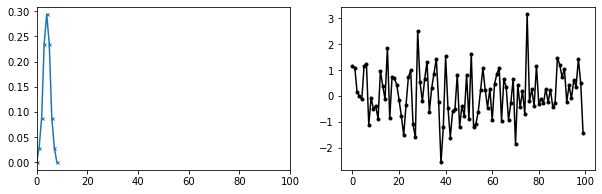

In [129]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))

ax[0].plot(kernel, marker = "x", markersize = 3)
ax[0].set_xlim(0, 100)

ax[1].plot(ts, marker = "o", markersize = 3, color = "black")

In [130]:
featureMap = np.zeros(len(ts))
for t in range(len(kernel)//2 + 1, len(ts) - len(kernel)//2):
    featureMap[t] = np.dot(kernel, ts[t-len(kernel)//2-1:t+len(kernel)//2])

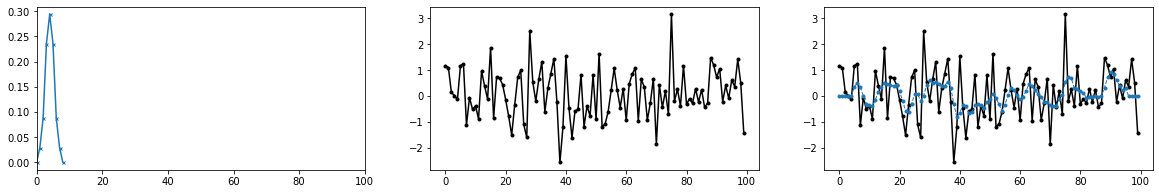

In [131]:
fig, ax = plt.subplots(1, 3, figsize = (20, 3))

ax[0].plot(kernel, marker = "x", markersize = 3)
ax[0].set_xlim(0, 100)

ax[1].plot(ts, marker = "o", markersize = 3, color = "black")

ax[2].plot(ts, marker = "o", markersize = 3, color = "black")
ax[2].plot(featureMap, marker = "o", markersize = 3, linestyle = "dashed", linewidth = 1)

### Q7

In [132]:
kernel = np.array([0, .1, .3, .8, -1, .8, .3, .1, 0]) # 고주파 필터
kernel = kernel/kernel.sum() # 커널 중앙 평균화!
ts = np.random.normal(size = (100, ))

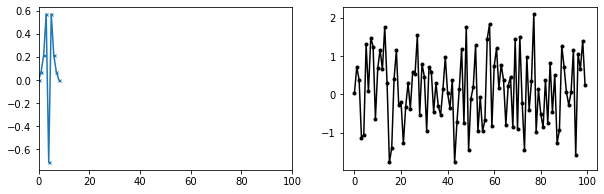

In [133]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))

ax[0].plot(kernel, marker = "x", markersize = 3)
ax[0].set_xlim(0, 100)

ax[1].plot(ts, marker = "o", markersize = 3, color = "black")

In [134]:
featureMap = np.zeros(len(ts))
for t in range(len(kernel)//2 + 1, len(ts) - len(kernel)//2):
    featureMap[t] = np.dot(kernel, ts[t-len(kernel)//2-1:t+len(kernel)//2])

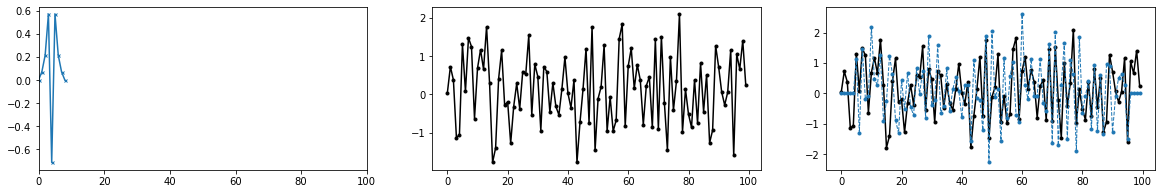

In [135]:
fig, ax = plt.subplots(1, 3, figsize = (20, 3))

ax[0].plot(kernel, marker = "x", markersize = 3)
ax[0].set_xlim(0, 100)

ax[1].plot(ts, marker = "o", markersize = 3, color = "black")

ax[2].plot(ts, marker = "o", markersize = 3, color = "black")
ax[2].plot(featureMap, marker = "o", markersize = 3, linestyle = "dashed", linewidth = 1)

### Q8

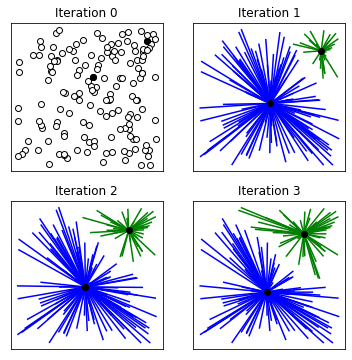

In [195]:
# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = ["green", "blue", "yellow"]


k = 2
points = np.random.random(size = (150, 2))
# randomly select centroids
centroids = points[np.random.choice(len(points), size = k, replace = False), :]

# plot data with initial random cluster centroids
axs[0].plot(points[:,0],points[:,1], 'ko', markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])

for iteration in range(1, 4):
    # step 1: compute distance between centroids and points
    dist = np.zeros(shape = (len(points), k))
    for c in range(k):
        dist[:, c] = np.sum((points - centroids[c])**2, axis = 1)

    # step 2: assign to group based on minimum distance
    gidx = np.argmin(dist, axis = 1)
    # step 3: recompute centers
    for ki in range(k):
        centroids[ki,:] = [np.mean(points[gidx == ki, 0]), np.mean(points[gidx == ki, 1]) ]

    for i in range(len(points)):
        c = gidx[i]
        axs[iteration].plot([points[i,0], centroids[c,0]], [points[i,1], centroids[c,1]], color = lineColors[c])
    axs[iteration].plot(centroids[:,0],centroids[:,1],'ko')
    axs[iteration].set_title(f'Iteration {iteration}')
    axs[iteration].set_xticks([])
    axs[iteration].set_yticks([])